## 14.10 Diagnosis for the logistic regression

When using a regression model, and in particular a logistic regression model, it is important to bear in mind the goal of the study. To simplify, it can be either a predictive goal or an explanatory goal. If the goal is to have a model with very good predictive ability, we do not really care about which variables are included in the model as long as its predictive abilities are good. When selecting the model, we will prefer a model with good predictive value on external data even at the price of a lesser good fit to the initial dataset. However, let us note that there is often a correlation between a model that fits corretly the initial data and a model with good predictive ability. If the goal is explanatory, we focus on the clinical validity of the model and the interpretation of the parameters. Thus, which variables are included into the model should be carefully thought using scientific knowledge of the modelisation problem from clinician inputs. Also, when selecting the model, we will prefer a model that carefully takes into account the relation between the variables from the study data rather than a model that have good predictive ability on an external dataset. However, we expect from a good model estimated from appropriate data that similar results shall be found on an appropriate external dataset. This is a topic of major interest in science and is known as the *reproducibility of scientific research*. Finally, let us also note that the goal of a study can also be to explore the causal structure between some variables and the outcome rather than just associations. However, causality and causal inference will not be mentioned in this lecture.

We will first see how to evaluate the explanatory abilities of a logistic regression model using goodness-of-fit tools that evaluates how close to the data the model actually is and then we will see how to evaluate the predictive abilities of a logistic regression model.

### 14.10.1 Goodness-of-fit

We have already seen some concepts used to assess the goodness-of-fit of regression model: the deviance, which measures the distance between the model and the saturated model and the AIC that penalizes over-fitting. We present here two additional way of assessing the goodness-of-fit of the logistic regression model.

#### 14.10.1.1 McFadden pseudo-$R^2$

For the linear regression model, we have studied the $R^2$ that measures how much variability is explained by the model. For the logistic regression model, several generalization of the $R^2$ measure have been proposed. Here, we will focus on the McFadden's pseudo-$R^2$. The McFadden $R^2$ is defined as follow:

$$R^2_{McFadden} = 1 - \frac{\ell_e}{\ell_0}$$

where $\ell_e$ is the log-likelihood of the estimated model and $\ell_0$ is the log-likelihood of the null model having only an intercept. The rationale behind this measure is that, when the estimated model does not explain correctly the variability, its log-likelihood will be close to the null log-likelihood so that the ratio will be close to $1$ and the McFadden's pseudo-$R^2$ close to $0$. On the contrary, when the model correctly explains the variability of the model, the likelihood will be close to $1$ and therefore $\ell_e$ will be close to $0$ so that the McFadden's pseudo-$R^2$ will be close to $1$. However, when applied to a classic linear regression model, the McFadden's pseudo-$R^2$ is not equivalent to the classic $R_2$.

It is possible to compute the McFadden's pseudo-$R^2$ from `R` quite easily using the function `logLik` that extracts the value of the estimated log-likelihood for a `glm` object. If we want to compute it for our three examples, this is how we would do

In [16]:
# first we estimate the null model
dementia0 <- glm(dementia ~ 1, data = dementia, family = binomial(link="logit")) 

# then we compute the McFadden pseudo-R2 for each model
R2_McFadden1 <- as.double(1 - logLik(dementia1)/logLik(dementia0))
R2_McFadden2 <- as.double(1 - logLik(dementia2)/logLik(dementia0))
R2_McFadden3 <- as.double(1 - logLik(dementia3)/logLik(dementia0))

round(c("model 1" = R2_McFadden1, "model 2" = R2_McFadden2, "model 3" = R2_McFadden3),3)

model 1 model 2 model 3 
  0.005   0.172   0.014

We can see that the second model which included three different variables is the one with the highest ability to explain the variability from the data. The first one performed poorly as it included only one binary variable and the third model also perform quite poorly even though we included an interaction between $bmi_i$ and $sex_i$.

#### 14.10.1.2 The Hosmer-Lemeshow test

The Hosmer-Lemeshow test (ref) is a classic approach to assess the goodness-of-fit of a logistic regression model. The rationale of this test is to divide the vector of predicted probabilites $\hat{\pi} = (\hat{\pi}_i)$ with $i=1,\dots,n$ into $G$ groups, e.g. based on the quantiles, with $n_g$ subjects. In each group, the mean of the predicted probabilites $\bar{\pi}_g$ is compared to the proportion of observed success. Formally, for the group $g=1,\dots,G$, we have that 

* the observed values are 
    * for Y = 1: $y_g$
    * for Y = 0: $n_g - y_g$
* the predicted values are
    * for Y = 1: $\bar{\pi}_gn_g$
    * for Y = 0: $n_g(1 - \bar{\pi}_g)$

The Hosmer-Lemeshow test statistics is based on the chi-square statistics computed over all groups and all possible values for $Y$

$$\sum_{g=1}^G\sum_{l=0}^1 \frac{(o_{gl} - e_{gl})^2}{e_{gl}} = \sum_{g=1}^G \frac{(n_g\bar{\pi}_g - y_g)^2}{n_g\bar{\pi}_g(1-\bar{\pi}_g)}$$

and has been shown to follow asymptotically a $\chi^2$ distribution with $g-2$ degrees of freedom under the null hypothesis of a correctly specified model. However, we insist on the fact that this test if often criticized for several reasons. First it is known to have low power. Secondly, its results can be sensible to the choice of the number of groups $G$ and this is even worst for small sample sizes.

The Hesmer-Lemeshow test statistics has not been implemented into the `glm` package but is available on the `ResourceSelection` package through the `hoslem.test` function.



In [17]:
library(ResourceSelection, quietly = TRUE)

ResourceSelection 0.3-5 	 2019-07-22


We can make the test for different values of $g$, for example for $g$ ranging from $5$ to $15$ and, for each, print the associated p-value.

In [18]:
for (g in 5:15) {
	print(hoslem.test(dementia2$y, fitted(dementia2), g=g)$p.value)
}

[1] 0.09098048
[1] 0.1496694
[1] 0.1485977
[1] 0.2253204
[1] 0.3575556
[1] 0.1946257
[1] 0.3013775
[1] 0.4373874
[1] 0.4974033
[1] 0.3596752
[1] 0.4791807


We can see that indeed, the p-value are very dependent upon the value of $g$ which makes this test not very appropriate to test for the goodness-of-fit of the model. However, here, all the p-values are over $0.05$ and therefore we do not reject the null hypothesis of a correctly specified model.

> *Hosmer, D. W., Lemeshow, S. (1980) Goodness of fit tests for the multiple logistic regression model. Communications in Statistics – Theory and Methods*

> Hosmer D. W., Lemeshow S. and Rodney X. S. Applied logistic regression. Wiley, 2013.

### 14.10.2 Predictive performance

The predictive performance of a model evaluates how well the model is able to predict the outcome for given observations. In certain cases, for example when developing diagnosis tools, the predictive performance of a model is essential.

#### 14.10.2.1 Predictions

When estimating a logistic regression model in `R`, we estimate all the parameters $(\beta_k)$ with $k=0,\dots,p$. From these and knowing the observed covariate values $(x_i)$ for each subject $i=1,\dots,n$, we could easily compute an estimate of $\pi_i$ the probability for subject $i$ of having $Y_i=1$. We could do it by hand, but we can also directly use the function `predict` whose goal is to compute the estimated outcome of subjects from given data according to a given estimated model. 

With the `predict` function, we can either compute the estimation on the linear predictor scale $\hat{\beta}^{\top}X$ or on the response scale $\exp(\hat{\beta}^{\top}X$)/(1+$exp(\hat{\beta}^{\top}X))$. Both are equivalent and the second can be computed from the first by using the inverse of the $\mathrm{logit}$ function as we have seen when introducing the logistic model. In `R`, the choice is made through the option `type`. By default, the prediction computed is on the linear predictor scale, when the option `type="response"` is chosen, the prediction will be on the response scale, here in $[0;1]$.

In [19]:
predicted <- predict(dementia2, dementia)
predicted_resp <- predict(dementia2, dementia, type = "response")

cbind("linear predictor" = head(predicted), "response" = head(predicted_resp), "response from linear predictor" = head(exp(predicted)/(1+(exp(predicted)))))

linear predictor,response,response from linear predictor
-4.769513,0.008413131,0.008413131
-3.130847,0.041852637,0.041852637
-6.530830,0.001455674,0.001455674
-6.065192,0.002316932,0.002316932
-1.230898,0.226024249,0.226024249
-4.723302,0.008807525,0.008807525


#### 14.10.2.2 Calibration

A model is said to be well calibrated if the predicted probabilities match the actual proportion of observed events in strata of the data. Generally, these strata are obtained by dividing the covariate space into a finite number of sets. However, when the covariate are continuous, the number of possible sets becomes large and these strata can become too little. Therefore, one approach is to group subjects according to their predicted probabilities and use these groups as strata, exactly as the Hosmer-Lemeshow test is doing.

#### 14.10.2.3 Sensitivity and Specificity

To compute the estimated outcome $\hat{y}_i$ from these estimated probabilies, we generally chose a threshold value $\alpha$ in the interval $]0,1[$, and for all subjects with $\pi_i<=\alpha$, $\hat{y}_i$ is fixed at $0$ while for all subjects with $\pi_i>\alpha$, $\hat{y}_i$ is fixed at $1$. To assess the predictive quality of the predictions, the idea is to compare the observed outcomes to the predicted outcomes. To do so, we introduce two notions: $Se$ the sensitivity and $Sp$ the specificity that are defined as follows

$$
\begin{align}
Se &= Pr(\hat{y}_i=1|y_i=1) = \frac{\sum_{i=1}^n 1_{(\hat{\pi}_i>\alpha~\&~ y_i=1~)}}{\sum_{i=1}^n 1_{(y_i=1)}}\\
Sp &= Pr(\hat{y}_i=0|y_i=0) = \frac{\sum_{i=1}^n 1_{(\hat{\pi}_i\leq\alpha~\&~ y_i=0~)}}{\sum_{i=1}^n 1_{(y_i=0)}}
\end{align}$$

The sensitivity is the rate of true positives and the specificity is the rate of true negatives. Ideally, we would want to make a prediction $\hat{y}$ of the outcome $y$ that gives at the same time high sensitivity and high specificity. The choice of $\alpha$, the threshold value, has obviously a great impact on the sensitivity and specificity values. For example, a high $\alpha$ will generate a high specificity but a low sensitivity while a low $\alpha$ will do the opposite. The goal is to have an optimal $\alpha$ that maximize both the sensitivity and specificity.

> *Exercise:* Write a code in `R` to compute $Se$ and $Sp$ for any value of $\alpha$

#### 14.10.2.4 The *receiving operator characteristic* (ROC) curve

The ROC curve is an intuitive way of plotting the relation between sensitivity and specificity computed for a whole range of values of $\alpha$ between $0$ and $1$. It plots $Se$ against $1-Sp$. It can directly be plotted in `R` with the function `roc` from the `pROC`package that takes as argument, the actual observed outcomes and the predicted response probabilities from the estimated model.

Type 'citation("pROC")' for a citation.

Attaching package: ‘pROC’

The following objects are masked from ‘package:stats’:

    cov, smooth, var

Setting levels: control = 0, case = 1
Setting direction: controls < cases


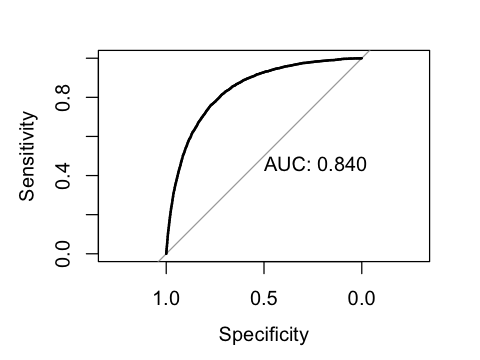

In [20]:
library(pROC, quietly = TRUE)
plot(roc(response = dementia$dementia, predictor = predicted_resp), print.auc = TRUE)

A perfect model should have a high sensitivity and a high specificity and its ROC curve shoud attain the top-left corner of the plot. A model without predictive ability shoud lie on the identity curve. The goal is to find a model that gets close to the top-left corner. To assess how close to the top-left corner a ROC curve is, one of the most used measure in the *area under the ROC*, often shortly referred in the literature as the *AUC* for *area under the curve*. The perfect model would have an AUC of $1$ while a poor model shall have an AUC of $0.5$, the goal is to find a model whose AUC gets close to $1$, i.e. that has high specificity and high sensitivity.

In our example, we find an AUC of $0.840$ which is quite good. However, we can expect to achieve better results with a more appropriate model as the example used here remains a very simple model.

> *Exercise:* Using the code you have written for computing $Se$ and $Sp$, write a code that plots the ROC curve.

Note that the ROC curve is a very traditional tool from the predictive toolkit but it is less and less used as it is not very informative \emph{per se} reporting directly the numbers is preferred. 

#### 14.10.2.5 External validation

In the example, we have estimated a model on the `dementia` dataset and have studied its prediction ability on the same data. This is not a good approach in general. The issue here is that, by estimating and validating the model on the exact same dataset, we might capture pattern specific to this dataset and the predictive ability of the model might be very different on external data.

A solution to tackle this issue is to use different data to estimate and validate the model in order to avoid overfitting to a particular dataset. The data used to estimate and calibrate the model is called *the learning data* and the data used to validate the prediction accuracy of the model is called the *validation data*. There are different ways of applying this idea into practice:

* we can divide the initial dataset into two parts (not necessarily of equal size): the learning one and the validation one
* the $k-$fold cross validation is a resampling technique that divides the initial dataset into $k$ smaller datasets. Each one of the $k$ groups will serves as a validation dataset for a model estimated on the other $k-1$ dataset. By repeating this for the $k$ small datasets separately, we obtain $k$ different predictions from which we can evaluate the goodness-of-fit of the model. When $k=1$, this method is known as the *leave-one-out* procedure
* the *bootstrap* procedure is a reseampling technique that artificially creates several dataset from the same initial dataset by resampling subjects with replacement
* use an external dataset from a different source as validation data for the model estimated from an initial dataset